In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data= pd.read_csv(r"E:\New folder\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
def remove_whitespace(data):
    data.columns = data.columns.str.strip().str.replace(' ', '_')
    return data

# Assuming you have a DataFrame called 'data'
data_cleaned = remove_whitespace(data)

# Display the updated column names
print(data_cleaned.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.shape

(7043, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [1]:
3. #EXPLORING DATA
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

NameError: name 'data' is not defined

In [11]:
# Assuming you want to check a column named 'SeniorCitizen' for null values
null_values = data['SeniorCitizen'].isnull().sum()
if null_values > 0:
    print("The column 'SeniorCitizen' has {} null value(s).".format(null_values))
else:
    print("The column 'SeniorCitizen' does not have any null values.")

The column 'SeniorCitizen' does not have any null values.


In [12]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(data[col].value_counts(normalize=True) * 100)
    print('---------------------------')

7590-VHVEG    0.014198
3791-LGQCY    0.014198
6008-NAIXK    0.014198
5956-YHHRX    0.014198
5365-LLFYV    0.014198
                ...   
9796-MVYXX    0.014198
2637-FKFSY    0.014198
1552-AAGRX    0.014198
4304-TSPVK    0.014198
3186-AJIEK    0.014198
Name: customerID, Length: 7043, dtype: float64
---------------------------
Male      50.47565
Female    49.52435
Name: gender, dtype: float64
---------------------------
No     51.69672
Yes    48.30328
Name: Partner, dtype: float64
---------------------------
No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64
---------------------------
Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64
---------------------------
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64
---------------------------
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64
---------------------------


In [13]:
data = data.drop('customerID', axis=1)  # Remove the 'customerID' column

Univariate Analysis


The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.
Numerical Features

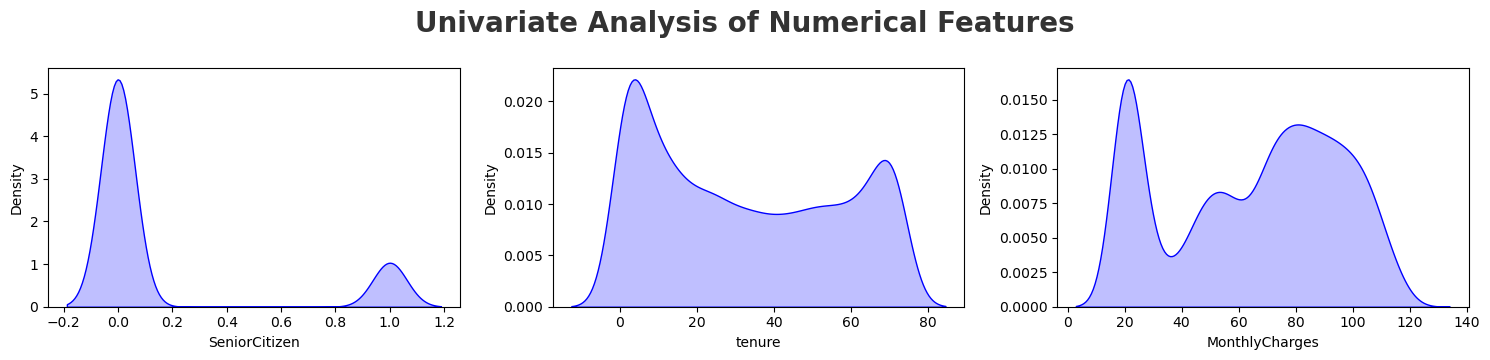

In [14]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(numeric_features):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(data[col], shade=True, color='b')
    plt.xlabel(col)
    plt.tight_layout()
    
plt.show()

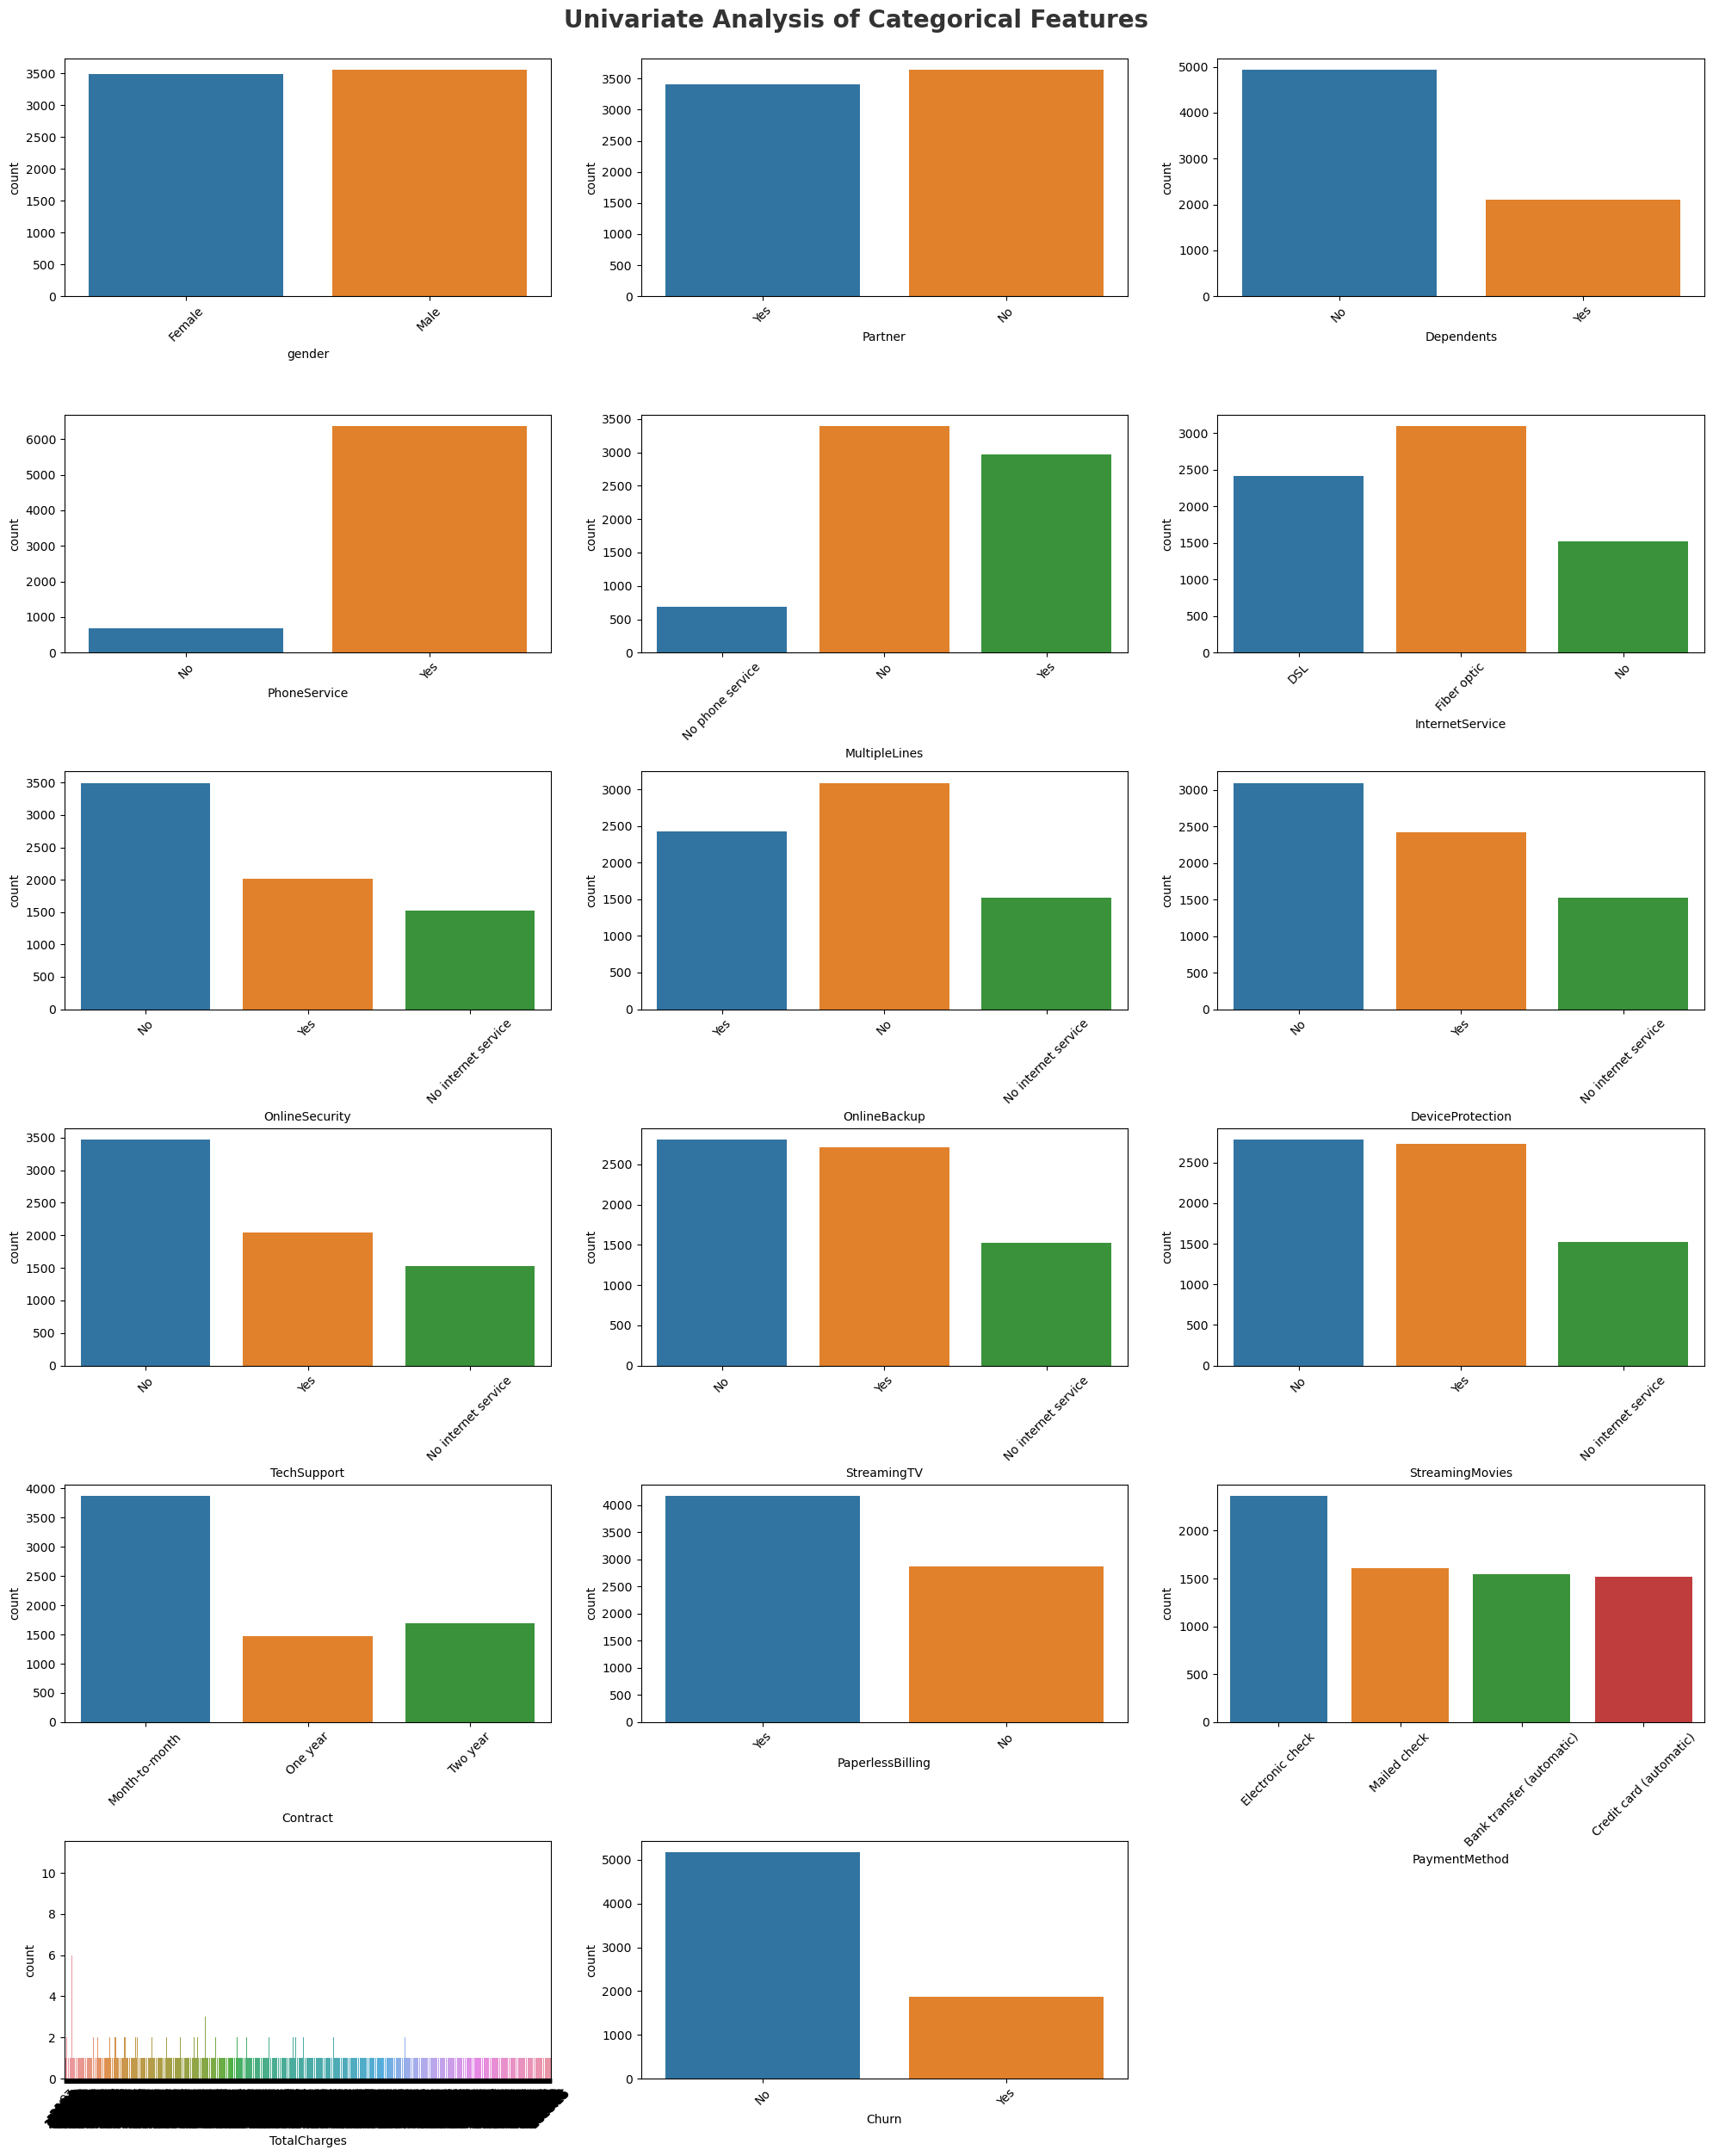

In [18]:
plt.figure(figsize=(20, 25))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(cat1) + num_cols - 1) // num_cols  # Calculate the number of rows needed

for i, col in enumerate(cat1, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data[col])
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

plt.show()

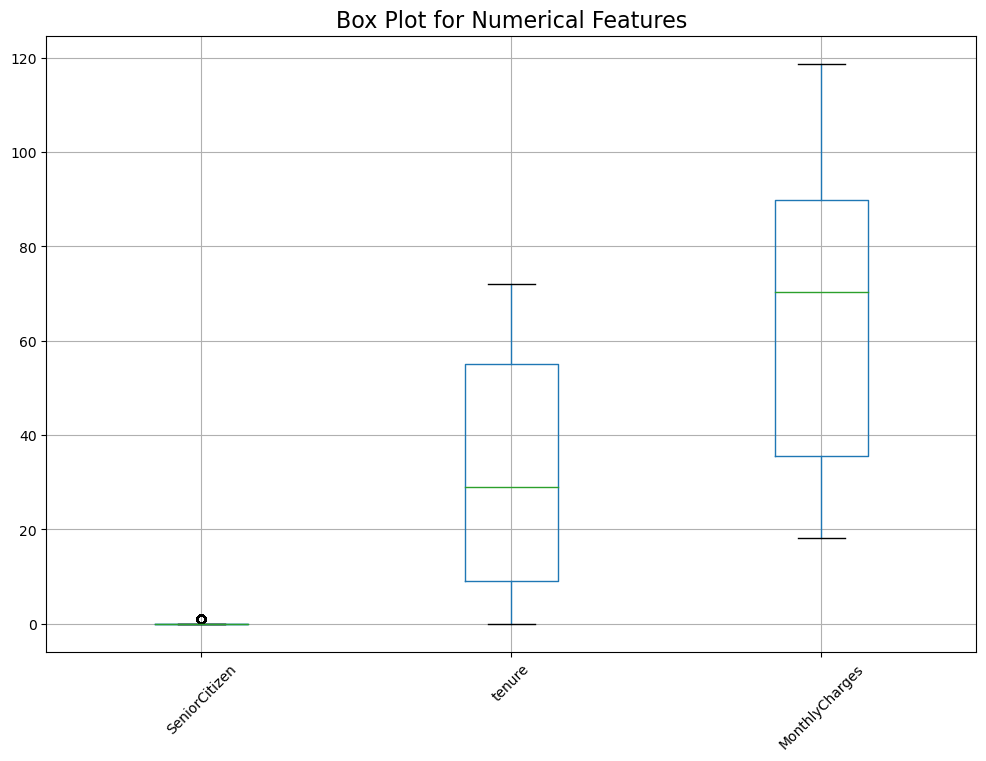

In [19]:
#checking outlier of  numerical features

plt.figure(figsize=(12, 8))
plt.title("Box Plot for Numerical Features", fontsize=16)

# Plot box plots for each numerical feature
data.boxplot(column=numeric_features)

plt.xticks(rotation=45)
plt.show()

In [24]:
from scipy import stats
# Calculate z-scores for each numerical feature
z_scores = stats.zscore(data[numeric_features])

# Define a threshold (e.g., z-score > 3) to identify outliers
outliers = (z_scores > 3).any(axis=1)

# Remove outliers from the DataFrame
data_cleaned = data[~outliers]

In [26]:
# Summary statistics before removing outliers
print("Summary Statistics Before Outlier Removal:")
print(data[numeric_features].describe())

print()  # Add a line break

# Summary statistics after removing outliers
print("Summary Statistics After Outlier Removal:")
print(data_cleaned[numeric_features].describe())

Summary Statistics Before Outlier Removal:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Summary Statistics After Outlier Removal:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


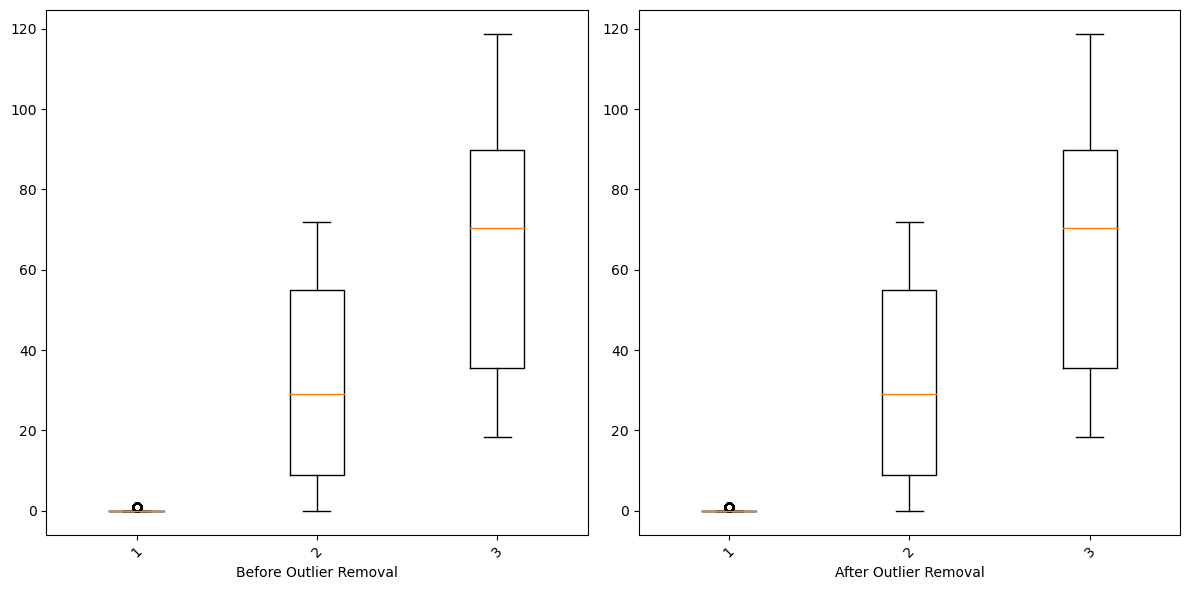

In [28]:
plt.figure(figsize=(12, 6))
plt.title("Box Plot - Numerical Features Before and After Outlier Removal", fontsize=16)

plt.subplot(1, 2, 1)
plt.boxplot(data[numeric_features])
plt.xticks(rotation=45)
plt.xlabel("Before Outlier Removal")

plt.subplot(1, 2, 2)
plt.boxplot(data_cleaned[numeric_features])
plt.xticks(rotation=45)
plt.xlabel("After Outlier Removal")

plt.tight_layout()
plt.show()


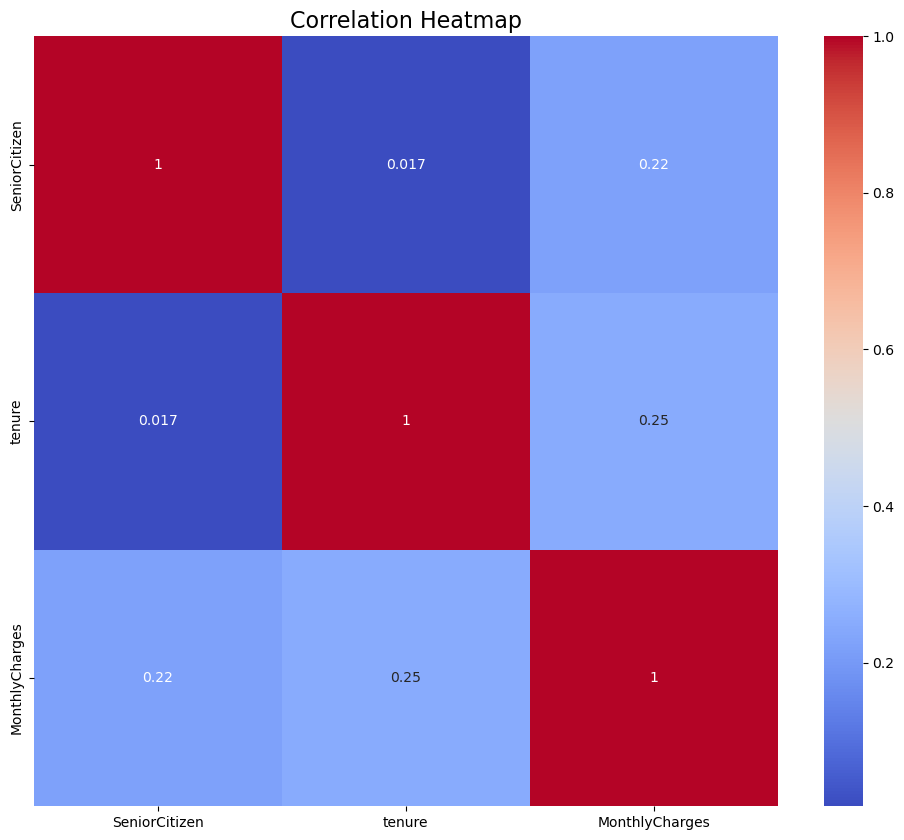

In [25]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for feature in categorical_features:
    if feature != 'customerID':  # Exclude 'customerID' from the loop
        data[feature] = label_encoder.fit_transform(data[feature])

In [32]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [35]:
# Split the data into features (X) and target variable (y)
X = data.drop('Churn', axis=1)  # Replace 'target' with the actual column name of your target variable
y = data['Churn']


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=35)

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [42]:
model=model.fit(X_train , y_train)

In [43]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' is your test target variable

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8146236559139785


In [46]:
from sklearn.metrics import accuracy_score

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' are your training and testing data

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7908011869436202
Testing Accuracy: 0.8146236559139785


In [50]:
# Handling missing values in numerical features
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges']  # Replace with your actual numerical feature names

for feature in numerical_features:
    mean_value = data[feature].mean()
    data[feature].fillna(mean_value, inplace=True)

# Handling missing values in categorical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
for feature in categorical_features:
    mode_value = data[feature].mode().values[0]
    data[feature].fillna(mode_value, inplace=True)

In [51]:
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7908011869436202
Testing Accuracy: 0.8146236559139785


In [56]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

# Create an instance of the logistic regression model
model = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_penalty = grid_search.best_params_['penalty']
best_solver = grid_search.best_params_['solver']
best_max_iter = grid_search.best_params_['max_iter']

In [57]:
# Create a new instance of the logistic regression model with tuned hyperparameters
tuned_model = LogisticRegression(C=best_C, penalty=best_penalty, solver=best_solver, max_iter=best_max_iter)

# Fit the model to the training data using the tuned hyperparameters
tuned_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'X_test' and 'y_test' are your test features and target variable, respectively

# Make predictions on the test data using the tuned model
y_pred_tuned = tuned_model.predict(X_test)

# Calculate various evaluation metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_tuned)

# Print or display the evaluation metrics to see the performance of the tuned model
print("Tuned Accuracy:", accuracy_tuned)
print("Tuned Precision:", precision_tuned)
print("Tuned Recall:", recall_tuned)
print("Tuned F1-Score:", f1_tuned)
print("Tuned ROC AUC:", roc_auc_tuned)

Tuned Accuracy: 0.8150537634408602
Tuned Precision: 0.6794354838709677
Tuned Recall: 0.5542763157894737
Tuned F1-Score: 0.6105072463768116
Tuned ROC AUC: 0.7308364689023081


In [59]:
import joblib

# Assuming 'tuned_model' is your trained logistic regression model
model_filename = 'tuned_logistic_regression_model.pkl'
joblib.dump(tuned_model, model_filename)

['tuned_logistic_regression_model.pkl']

In [60]:
# Load the trained model from the file
loaded_model = joblib.load(model_filename)

In [74]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(random_state=42)

In [86]:
model1

RandomForestClassifier(random_state=42)

In [91]:
model1=model1.fit(X_train , y_train)

In [92]:
# Make predictions on the test data
y_pred1 = model1.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' is your test target variable

# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)

Accuracy: 0.7565591397849463


In [94]:
from sklearn.metrics import accuracy_score

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' are your training and testing data

# Calculate training and testing accuracy
train_accuracy1 = accuracy_score(y_train, model1.predict(X_train))
test_accuracy1 = accuracy_score(y_test, model1.predict(X_test))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7908011869436202
Testing Accuracy: 0.8146236559139785


In [97]:
from sklearn.ensemble import GradientBoostingClassifier
model2=model1.fit(X_train , y_train)

In [98]:
y_pred2=model2.predict(X_test)

In [101]:
y_pred2

array([0, 0, 0, ..., 0, 1, 0])

In [102]:
# Calculate accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.7565591397849463


In [103]:
import joblib

# Assuming 'model' is your trained model
model_filename = 'model.pkl'
joblib.dump(model, model_filename)

['model.pkl']